In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("F:\\ML_DATASETS\\diabetes2.csv")  

In [3]:
data.shape

(768, 10)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Output
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2


In [5]:
data.isnull().values.any()   # to check if null value is present or not

False

In [6]:
data.dropna(inplace=True)

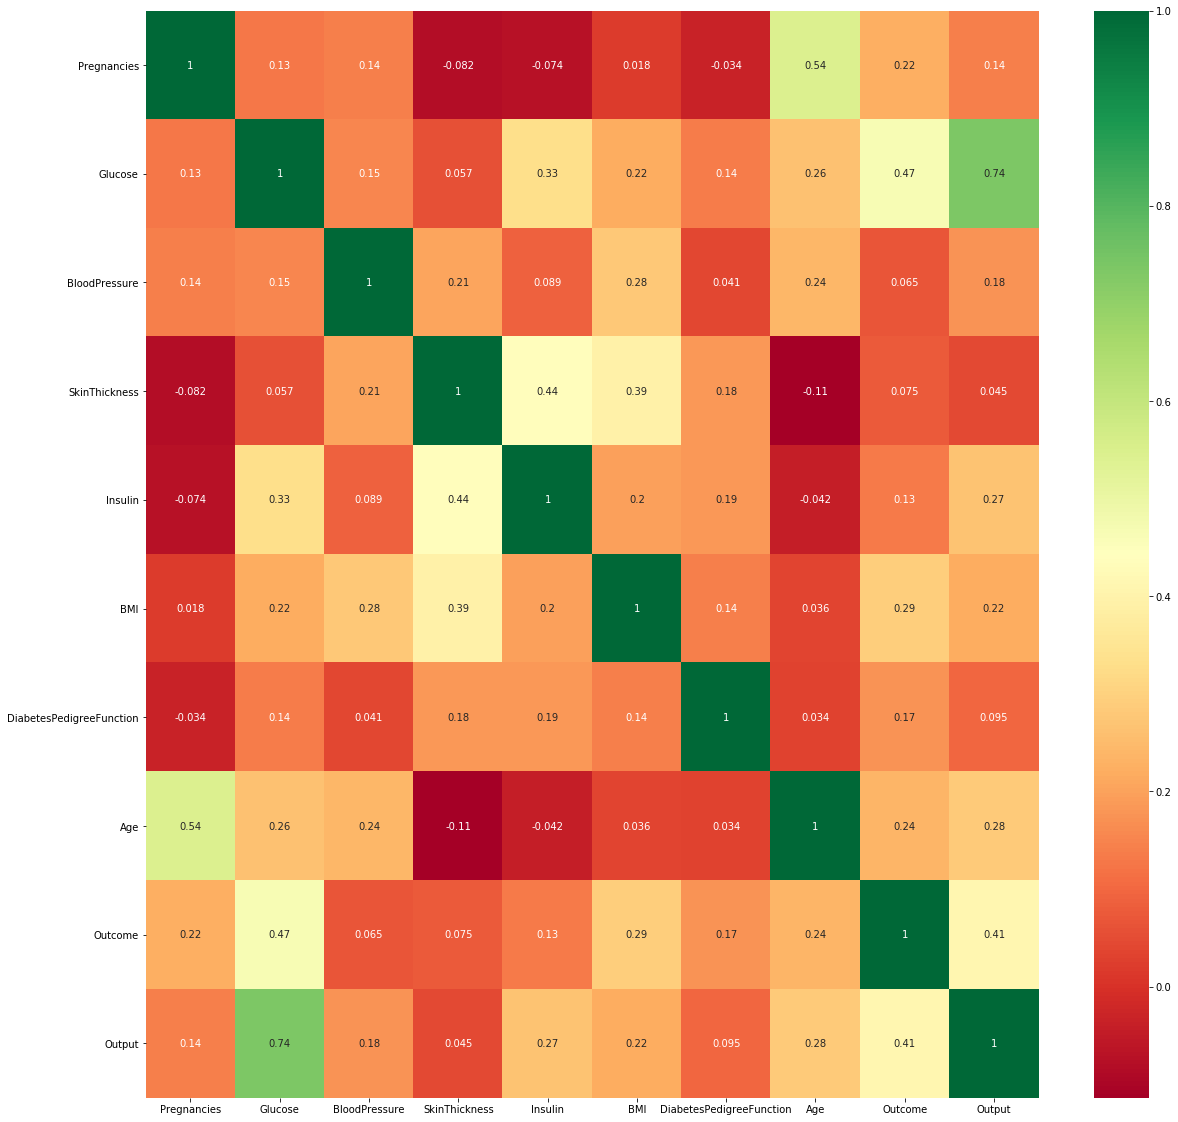

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# get correlations of each features in dataset
corl=data.corr()
top_corr_features=corl.index
plt.figure(figsize=(20,20))
# plot heat map
r=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Output
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.139418
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.736234
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.175988
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.045478
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.267073
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.219010
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.095017
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.283590
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.411269
Output,0.139418,0.736234,0.175988,0.045478,0.267073,0.219010,0.095017,0.283590,0.411269,1.000000


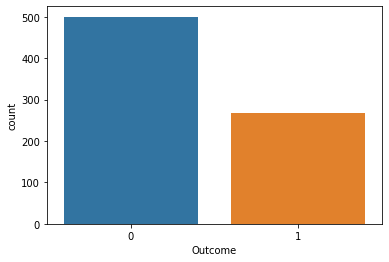

In [9]:
sns.countplot(data['Outcome'],label='count')

In [10]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Output
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2


In [11]:
# Train Test split using sklearn
from sklearn.model_selection import train_test_split
x=data.loc[:,data.columns!='Outcome']   # data
y=data['Outcome']      # target
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=66)


# Training and Testing the model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

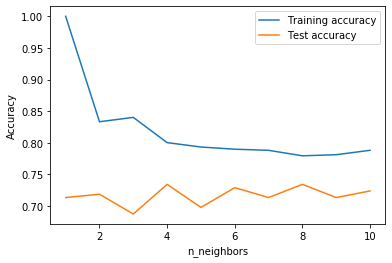

In [13]:
training_accuracy=[]
test_accuracy=[]
neighbors_no=range(1,11)
for n_neighbors in neighbors_no:
    # build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbors_no,training_accuracy,label="Training accuracy")
plt.plot(neighbors_no,test_accuracy,label="Test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [14]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [18]:
X_new=np.array([[5,147,70,35,0,33.6,0.657,54,2]])
print("Xnew_shape:",X_new.shape)

Xnew_shape: (1, 9)


In [19]:
prediction=knn.predict(X_new)
print("prediction: ",prediction)

prediction:  [1]


In [20]:
y_pred=knn.predict(X_test)
print('Test set prediction : ',y_pred)

Test set prediction :  [0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1
 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0]


In [21]:
print("Test set score:",np.mean(y_pred==y_test))

Test set score: 0.7135416666666666


In [22]:
print('Accuracy of K-NN classifier on training set:',knn.score(X_train,y_train))
print('Accuracy of K-NN classifier on test set:',knn.score(X_test,y_test))

Accuracy of K-NN classifier on training set: 0.78125
Accuracy of K-NN classifier on test set: 0.7135416666666666


In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [24]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6578744209984559

In [26]:
from sklearn.externals import joblib

C:\Users\amit gupta\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [27]:
joblib.dump(knn,open('model.pkl','wb'))

In [29]:
model=joblib.load(open('model.pkl','rb'))

In [31]:
prediction=model.predict([[5,147,70,35,0,33.6,0.657,54,2]])

In [32]:
print(prediction)

[1]
